### PyTorch workflow

<table>
<thead>
<tr>
<th><strong>Topic</strong></th>
<th><strong>Contents</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>1. Getting data ready</strong></td>
<td>Data can be almost anything but to get started we're going to create a simple straight line</td>
</tr>
<tr>
<td><strong>2. Building a model</strong></td>
<td>Here we'll create a model to learn patterns in the data, we'll also choose a <strong>loss function</strong>, <strong>optimizer</strong> and build a <strong>training loop</strong>.</td>
</tr>
<tr>
<td><strong>3. Fitting the model to data (training)</strong></td>
<td>We've got data and a model, now let's let the model (try to) find patterns in the (<strong>training</strong>) data.</td>
</tr>
<tr>
<td><strong>4. Making predictions and evaluating a model (inference)</strong></td>
<td>Our model's found patterns in the data, let's compare its findings to the actual (<strong>testing</strong>) data.</td>
</tr>
<tr>
<td><strong>5. Saving and loading a model</strong></td>
<td>You may want to use your model elsewhere, or come back to it later, here we'll cover that.</td>
</tr>
<tr>
<td><strong>6. Putting it all together</strong></td>
<td>Let's take all of the above and combine it.</td>
</tr>
</tbody>
</table>

In [1]:
what_we_covering = {
    1: "data (prepare and load)",
    2: "build model", 
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating the model (inference)",
    5: "saving and loading your model",
    6: "putting it all together" 
}
what_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading your model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

## Data. Preparing and loading

Data can be almost anything 
* excel spreadshit
* images
* videos
* audio
* DNA
* text

ML (DL) is a game of two parts
1. Get data into numerical representation
2. Build a model to learn patterns in that data in that numerical representation

To showcase this let's create some *known* data using the linear regression formula.

In [3]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
One of most important steps in a machine learning project is creating a training 
and test set (and when required, a validation set).

#### Three datasets
1. Training set 70%
2. Validation set 15%
3. Test set 15%

**Generalisation** - the ability for a ml model to perform well in data it hasn't seen before

lets create a test set with our data


In [5]:
# create a train/test sprit
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# Visualisation

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """Plots training data, test data and compares prediction"""
    plt.figure(figsize=(10, 7))
    
    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b",s=4, label="Training data")
    
    #plot test data
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    # plot there predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    # show the legend
    plt.legend(prop={"size":14});

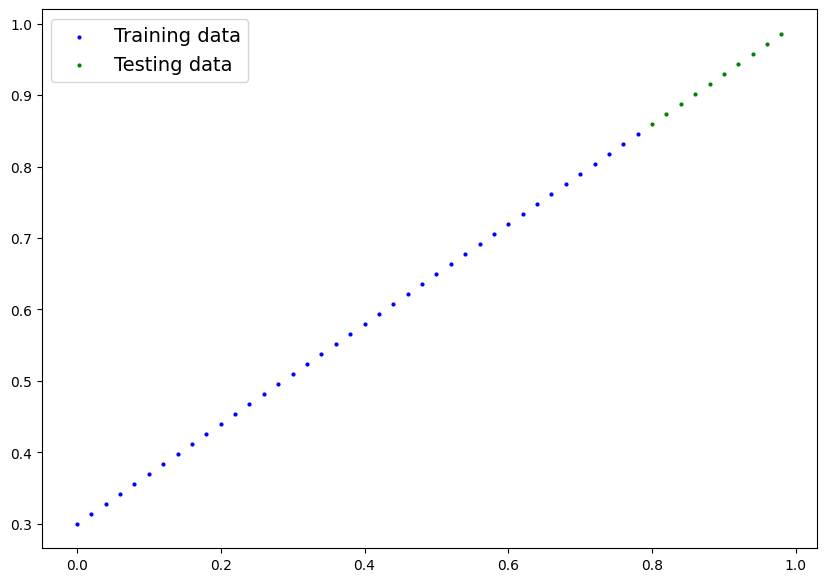

In [8]:
plot_predictions();

## 2. Build model

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent(or get closer to) the idea values (weight and bias)

How does it do so?

Through two mail algorithms:
1. Gradient descent
2. Backpropagation



In [9]:
# Create a linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # <-almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered as computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set there for us
* torch.nn.Module - the base class for all neural networks modules, if you subclass it, you should overwrite `forward()`
* torch.optim - this is the optimizers in PyTorch live, the will help with gradient descent
* def forward() - all nn.Module subclasses require you to owerwrite forward(), this method defines what happens in the forward computation
* torch.utils.data.Dataset - represents map between key (label) and a sample (features) pairs of yor data. Such as images and their associated labels
* torch.utils.data.DataLoader - creates a python iterable over a torch Dataset (allows you to iterate over your data)

Cheatsheet here https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our model

We can check our model parameters or what's inside our model using `.parameters()`

In [10]:
# create a random seed

torch.manual_seed(42)

# create an instance of the model 
model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [11]:
list( model_0.parameters() )

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check out model predictive power let's see how well it predixed y_test based on x_test

Then we pass data through our model, it's going to run it through the `forward` method

In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
# male prediction with model

with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

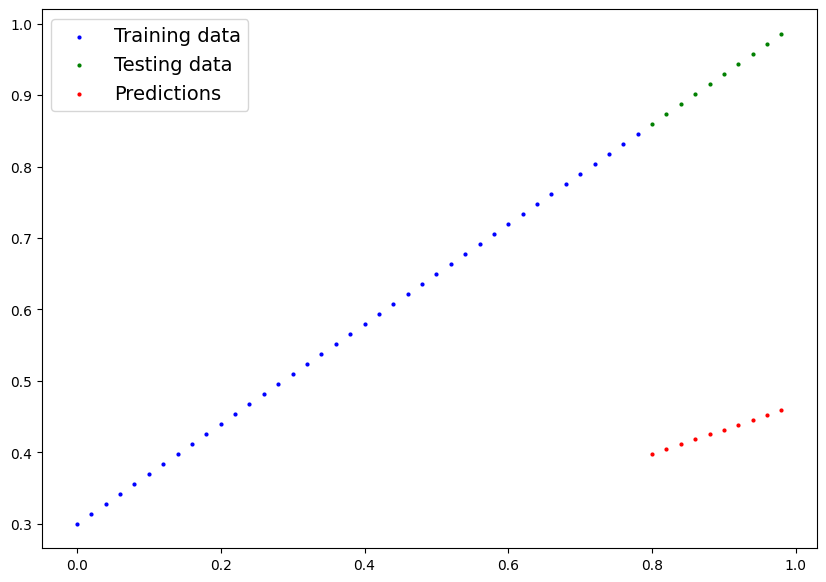

In [17]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters
Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use loss function.

* Note: loss function also called cost function or criterion in different areas
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs. Lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (weight and bias) to improve the loss function.

And specifically for PyTorch we need:
* Training loop
* Testing loop



In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# setup a loss func
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
#lr = learning rate - possibly the most important hyperparameter you can set
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


### Build a training loop (and testing loop)

Couple things we need in a training loop:
    0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move pass through network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [21]:
# an epoch is the one loop through the data
epochs = 200

#Tracking experiments
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. loop through the data
test_loss = 100
for epoch in range(epochs):
    # set the model to training mode
    # train mode in Pytorch sets all parameters that require gradients to require gradients
    model_0.train() 
    
    # 1. forward pass
    y_pred = model_0(X_train)
    
   
    
    #" 2. calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimize zero grad
    optimizer.zero_grad()
    
    # 4. perform back propagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. step the optimizer (perform gradient descent)
    optimizer.step()
    
    # eval turns off gradient tracking
    model_0.eval()
    
    #testing        
    with torch.inference_mode():
        test_pred = model_0(X_test)
        
        # if loss_fn(test_pred, y_test) >= test_loss:
        #     break;
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 ==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        

    

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

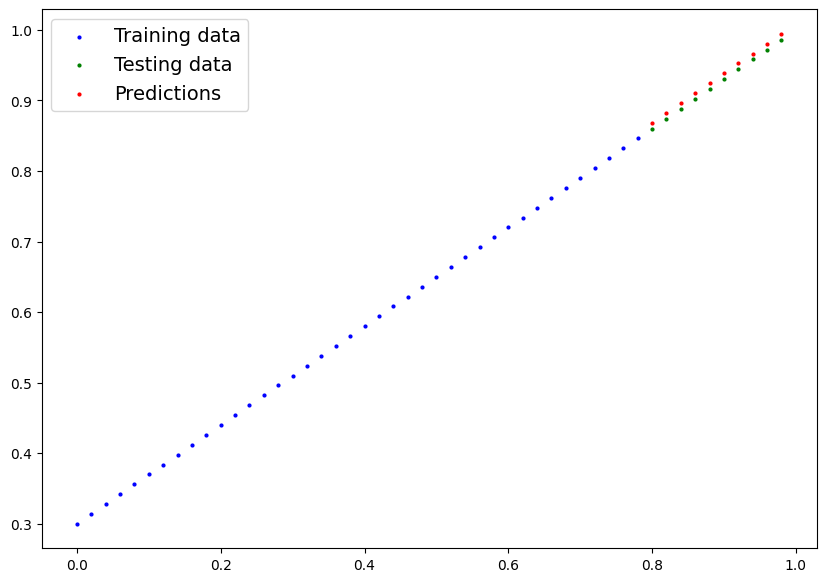

In [22]:
y_pred = model_0(X_test)
plot_predictions(predictions=y_pred.detach())

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
import numpy as np
np.array(torch.tensor(train_loss_values).cpu().numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

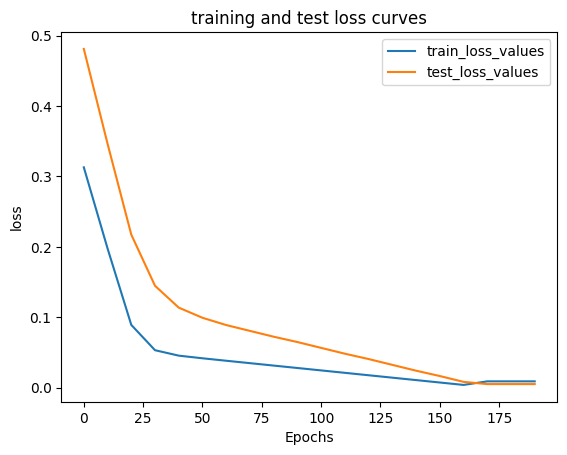

In [25]:
# plot the loss curves

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label="train_loss_values")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="test_loss_values")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend();

### Saving a model in Pytorch

Three main methods for saving and loading models

1. `torch.save()` - allows you to save pytorch object in pythons pickle format
2. `torch.load()` - to load saved pytorch object
3. `torch.nn.Module.load_state_dict()` - to load a model's saved state dictionary

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [55]:
from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("{$SECRET}/deep_learning_pytorch/models")
#MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.create a model save path
MODEL_NAME = "01_PyTorch_Workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
# 3. save model's save dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [59]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0

LinearRegressionModel()

In [60]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])